# Constructing a de novo 2D ensemble of HIV-1 TAR

# Required imports

In [5]:
from BME import bme_reweight as bme
import pandas as pd
import numpy as np
from reweighting import *
from PyRNA import *
from itertools import combinations, permutations
import seaborn as sns

Load HIV-1 TAR

In [7]:
import joblib
filename = "BME/data/states_HIV_TAR.sav"
results = joblib.load(filename)

Filter out duplicates 

<AxesSubplot:>

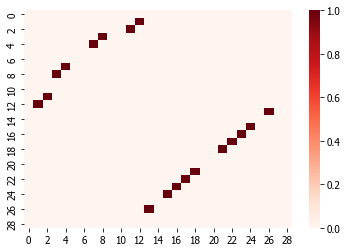

In [8]:
bp_matrix = state2basepair_matrix(results[-1])
sns.heatmap(bp_matrix,cmap='Reds')

In [10]:
bp_matrices = []
final_states = []
visualize = False

for i, result in enumerate(results):
    bp_matrix = state2basepair_matrix(result)
    if visualize: visualize_structure(bp_matrix, label = 'UUCG-tetraloop', edge_cmap = plt.cm.viridis)
    # filter
    bp_matrices.append(bp_matrix)
    final_states.append(result)
    
    # filter out duplicate matrices
    for pair in combinations(bp_matrices, 2):
        if np.array_equal(pair[0], pair[1]):
            _ = bp_matrices.pop()
            _ = final_states.pop()

* Write out CT files, which will be used to get chemical shifts
* Get get priors (initial weights)

In [11]:
priors = []
energies = []
for i, state in enumerate(final_states):
    CT = state2CT(state)
    # name = "/content/BME/data/CTs/TAR_%s.ct"%(i+1)
    energy = get_free_energy_from_stems(state['assembled_stems'], state['stem_energies'])    
    energies.append(energy)
    priors.append(boltzmann_weight(energy))
    # writeCT(CT, name, energy)

Only keep the first 32

In [12]:
energies = np.array(energies[:32])
priors = np.array(priors[:32])
priors /= np.sum(priors)

## BME Reweighting with Assigment Data

In [18]:
expcs_bme, simcs_bme = write_BME_chemical_shifts(input_exp = "measured_shifts_1YMO.txt", 
                              input_sim = "1YMO.csv",
                              input_accuracy = "uncertainity.dat",
                              output_name_exp = "bme_experimental_1YMO_assigned.dat", 
                              output_name_sim = "bme_simulated_2D_assigned.dat")

With priors...

In [29]:
import matplotlib.pyplot as plt
weights_l, chi2_before_l, chi2_after_l, srel_l = [], [], [], []
for theta in range(0, 100, 1):
    try:
        weights, chi2_before, chi2_after, srel = find_weights(exp_file = "bme_experimental_1YMO_assigned.dat", sim_file = "bme_simulated_2D_assigned.dat", theta = theta, w0 = priors)
        weights_l.append(weights)
        chi2_before_l.append(chi2_before)
        chi2_after_l.append(chi2_after)
        srel_l.append(srel)
    except:
        print('convergence failure')

# Set non-uniform initial weights from file. Sum= 1.0000000000000002 32
# Warning: expt average                    0=9.2726e+01 is larger than maximum value in simulation 9.2659e+01
# Warning: expt average                    1=9.2726e+01 is larger than maximum value in simulation 9.2659e+01
# Warning: expt average                    2=7.4926e+01 is smaller than minimum value in simulation 7.5181e+01
# Warning: expt average                    3=7.4926e+01 is smaller than minimum value in simulation 7.5181e+01
# Warning: expt average                    4=7.4360e+01 is larger than maximum value in simulation 7.4015e+01
# Warning: expt average                    5=7.4360e+01 is larger than maximum value in simulation 7.4015e+01
# Warning: expt average                   16=4.8040e+00 is larger than maximum value in simulation 4.7829e+00
# Warning: expt average                   17=4.8040e+00 is larger than maximum value in simulation 4.7829e+00
# Warning: expt average                   18=4

In [31]:
weights_l

[]

In [22]:
which = np.argmin(chi2_after_l)
plt.plot(chi2_after_l, 'r--', chi2_before_l, 'bs')
pd.options.display.float_format = '{:.2f}'.format
plt.bar(range(1,1+len(weights_l[which])), weights_l[which])
data = pd.DataFrame({"model": [i for i in range(1,1+len(weights_l[which])) ],  "energy": energies, "w_prior": weights_l[which]})

ValueError: attempt to get argmin of an empty sequence

Without priors...

In [ ]:
%%capture
import matplotlib.pyplot as plt
weights_l, chi2_before_l, chi2_after_l, srel_l = [], [], [], []
for theta in range(0, 100, 1):
    try:
        weights, chi2_before, chi2_after, srel = find_weights(exp_file = wd + "bme_experimental_7JU1_assigned.dat", sim_file = wd + "bme_simulated_2D_assigned.dat", theta = theta, w0 = None)
        weights_l.append(weights)
        chi2_before_l.append(chi2_before)
        chi2_after_l.append(chi2_after)
        srel_l.append(srel)
    except:
        print('convergence failure')

In [ ]:
chi2_after_l

[5.362096181853995,
 3.3423337835233125,
 2.2603133603960788,
 1.9913346984269178,
 1.9457912109782318,
 1.9287547320142489,
 1.9918987170165166,
 1.9236268390987743,
 2.5318381152153404,
 2.45690253477372,
 2.0816755380290526,
 2.056434838219675,
 2.1627790012039587,
 1.9313913618471057,
 1.9310105369056976,
 1.9276684672445512,
 1.933062330704138,
 1.9430943792706992,
 1.9282977642712196,
 1.9339503647676746,
 1.9323402828454537,
 1.9444436255824473,
 2.0002402052832893,
 1.9396297320137226,
 1.9401117250942213,
 1.9482698392919628,
 1.950309214292969,
 1.9562362670053917,
 1.948895323614969,
 1.9473539728429994,
 1.965048154572693,
 1.9760834469497202,
 1.9596190099148176,
 1.9759331462226528,
 1.9753538409086637,
 1.9533300765225496,
 1.9558148367896804,
 1.9610470608086628,
 1.9780256975457766,
 1.9947737740351963,
 1.9635628081884413,
 1.9637494763590442,
 1.995475044607487,
 1.9682419070786679,
 1.9750428938498548,
 1.9772118847819262,
 1.9783581265570238,
 1.9858778861693351,
 

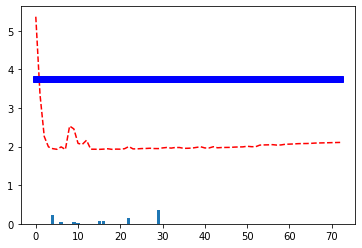

model  energy  w_prior  wo_prior
0       1 -172.92     0.00      0.00
1       2 -170.08     0.00      0.00
2       3 -170.08     0.00      0.00
3       4 -216.70     0.82      0.24
4       5 -210.09     0.00      0.00
5       6 -121.58     0.00      0.04
6       7 -121.58     0.00      0.00
7       8 -193.87     0.00      0.00
8       9 -170.09     0.00      0.05
9      10 -216.70     0.18      0.02
10     11 -190.09     0.00      0.00
11     12 -211.03     0.00      0.00
12     13 -144.41     0.00      0.00
13     14 -144.41     0.00      0.00
14     15 -144.41     0.00      0.06
15     16 -121.58     0.00      0.06
16     17 -166.31     0.00      0.00
17     18 -191.03     0.00      0.00
18     19 -145.36     0.00      0.00
19     20 -190.09     0.00      0.00
20     21 -170.09     0.00      0.00
21     22 -171.03     0.00      0.16
22     23 -144.41     0.00      0.00
23     24 -155.91     0.00      0.00
24     25 -161.58     0.00      0.00
25     26 -134.02     0.00      0.00
26     27 -191.03     0.00      0.00
27     28 -164.42     0.00      0.00
28     29 -193.87     0.00      0.37
29     30 -144.41     0.00      0.00
30     31 -165.36     0.00      0.00
31     32 -193.86     0.00      0.00

In [ ]:
which = np.argmin(chi2_after_l)
plt.plot(chi2_after_l, 'r--', chi2_before_l, 'bs')
pd.options.display.float_format = '{:.2f}'.format
plt.bar(range(1,1+len(weights_l[which])), weights_l[which])
plt.show()
data['wo_prior'] = weights_l[which]
data.to_csv(wd + 'TAR_2D_weights.txt')
data

Visualize average structures...

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

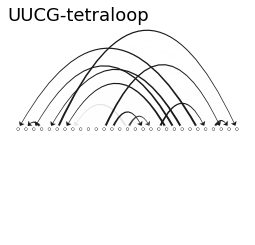

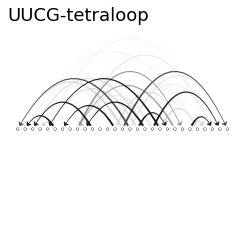

In [ ]:
visualize_structure(average_bp(bp_matrices[:32], data['w_prior']), figname = wd + "average_TAR_w_prior.pdf")
visualize_structure(average_bp(bp_matrices[:32], data['wo_prior']), figname = wd + "average_TAR_wo_prior.pdf")

Get probabilities U7-G10 and G10-C23

In [ ]:
avg_bp_wo_prior = average_bp(bp_matrices[:32], data['wo_prior'])
i, j = 7, 10
print(avg_bp_wo_prior[i-1,j-1])
i, j = 10, 23
print(avg_bp_wo_prior[i-1,j-1])

0.37012400492885084
0.4115708254622197


## BME with Unassigned Data

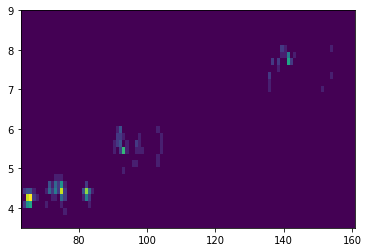

In [ ]:
# get cs
cs = merge_exp_computed_cs(input_exp = wd + "measured_shifts_7JU1.dat", input_sim = wd + "computed_chemical_shifts_TAR_2D.txt")

# pair carbon and proton chemical shifts
expcs_paired, simcs_paired = create_paired_data(cs)

# generate histograms
expcs_hist, simcs_hist = create_histogram_data(expcs_paired, simcs_paired)

# write files for BME
expcs_bme, simcs_bme = write_BME_chemical_shifts_unassigned(expcs_hist, simcs_hist, output_name_exp = wd + "bme_experimental_7JU1_unassigned.dat", 
                                                                                    output_name_sim = wd + "bme_simulated_7JU1_unassigned.dat", error = 1)

In [ ]:
cs.to_csv("data/merged.txt", index= False, sep = " ", header=False)

FileNotFoundError: ignored

In [ ]:
cs.columns

Index(['model', 'resid', 'resname', 'nucleus', 'simcs', 'id', 'expcs', 'NA'], dtype='object')

With priors...

In [ ]:
%%capture
import matplotlib.pyplot as plt
weights_l, chi2_before_l, chi2_after_l, srel_l = [], [], [], []
for theta in range(0, 100, 1):
    try:
        weights, chi2_before, chi2_after, srel = find_weights(exp_file = "data/bme_experimental_7JU1_unassigned.dat", sim_file = "data/bme_simulated_7JU1_unassigned.dat", theta = theta, w0 = priors)
        weights_l.append(weights)
        chi2_before_l.append(chi2_before)
        chi2_after_l.append(chi2_after)
        srel_l.append(srel)
    except:
        print('convergence failure')


model  energy  w_prior  wo_prior  w_prior_uassigned
0       1 -172.92     0.00      0.00               0.00
1       2 -170.08     0.00      0.00               0.00
2       3 -170.08     0.00      0.00               0.00
3       4 -216.70     0.81      0.24               0.23
4       5 -210.09     0.00      0.00               0.00
5       6 -121.58     0.00      0.04               0.00
6       7 -121.58     0.00      0.00               0.00
7       8 -193.87     0.00      0.00               0.00
8       9 -170.09     0.00      0.05               0.00
9      10 -216.70     0.19      0.02               0.53
10     11 -190.09     0.00      0.00               0.00
11     12 -211.03     0.00      0.00               0.00
12     13 -144.41     0.00      0.00               0.00
13     14 -144.41     0.00      0.00               0.00
14     15 -144.41     0.00      0.06               0.00
15     16 -121.58     0.00      0.06               0.00
16     17 -166.31     0.00      0.00               0.00
17     18 -191.03     0.00      0.00               0.00
18     19 -145.36     0.00      0.00               0.00
19     20 -190.09     0.00      0.00               0.00
20     21 -170.09     0.00      0.00               0.00
21     22 -171.03     0.00      0.16               0.00
22     23 -144.41     0.00      0.00               0.00
23     24 -155.91     0.00      0.00               0.00
24     25 -161.58     0.00      0.00               0.00
25     26 -134.02     0.00      0.00               0.00
26     27 -191.03     0.00      0.00               0.24
27     28 -164.42     0.00      0.00               0.00
28     29 -193.87     0.00      0.37               0.00
29     30 -144.41     0.00      0.00               0.00
30     31 -165.36     0.00      0.00               0.00
31     32 -193.86     0.00      0.00               0.00

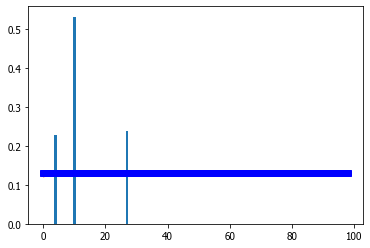

In [ ]:
which = np.argmin(chi2_after_l)
plt.plot(chi2_after_l, 'r--', chi2_before_l, 'bs')
pd.options.display.float_format = '{:.2f}'.format
plt.bar(range(1,1+len(weights_l[which])), weights_l[which])
data['w_prior_uassigned'] = weights_l[which]
data.to_csv('data/TAR_2D_weights.txt')
data

Without priors...

In [ ]:
%%capture
import matplotlib.pyplot as plt
weights_l, chi2_before_l, chi2_after_l, srel_l = [], [], [], []
for theta in range(0, 100, 1):
    try:
        weights, chi2_before, chi2_after, srel = find_weights(exp_file = "data/bme_experimental_7JU1_unassigned.dat", sim_file = "data/bme_simulated_7JU1_unassigned.dat", theta = theta, w0 = None)
        weights_l.append(weights)
        chi2_before_l.append(chi2_before)
        chi2_after_l.append(chi2_after)
        srel_l.append(srel)
    except:
        print('convergence failure')


model  energy  w_prior  wo_prior  w_prior_uassigned  wo_prior_uassigned
0       1 -172.92     0.00      0.00               0.00                0.00
1       2 -170.08     0.00      0.00               0.00                0.00
2       3 -170.08     0.00      0.00               0.00                0.00
3       4 -216.70     0.81      0.24               0.23                0.07
4       5 -210.09     0.00      0.00               0.00                0.00
5       6 -121.58     0.00      0.04               0.00                0.00
6       7 -121.58     0.00      0.00               0.00                0.00
7       8 -193.87     0.00      0.00               0.00                0.00
8       9 -170.09     0.00      0.05               0.00                0.00
9      10 -216.70     0.19      0.02               0.53                0.37
10     11 -190.09     0.00      0.00               0.00                0.02
11     12 -211.03     0.00      0.00               0.00                0.00
12     13 -144.41     0.00      0.00               0.00                0.15
13     14 -144.41     0.00      0.00               0.00                0.00
14     15 -144.41     0.00      0.06               0.00                0.00
15     16 -121.58     0.00      0.06               0.00                0.00
16     17 -166.31     0.00      0.00               0.00                0.00
17     18 -191.03     0.00      0.00               0.00                0.00
18     19 -145.36     0.00      0.00               0.00                0.00
19     20 -190.09     0.00      0.00               0.00                0.00
20     21 -170.09     0.00      0.00               0.00                0.00
21     22 -171.03     0.00      0.16               0.00                0.05
22     23 -144.41     0.00      0.00               0.00                0.00
23     24 -155.91     0.00      0.00               0.00                0.00
24     25 -161.58     0.00      0.00               0.00                0.03
25     26 -134.02     0.00      0.00               0.00                0.02
26     27 -191.03     0.00      0.00               0.24                0.23
27     28 -164.42     0.00      0.00               0.00                0.00
28     29 -193.87     0.00      0.37               0.00                0.03
29     30 -144.41     0.00      0.00               0.00                0.03
30     31 -165.36     0.00      0.00               0.00                0.00
31     32 -193.86     0.00      0.00               0.00                0.00

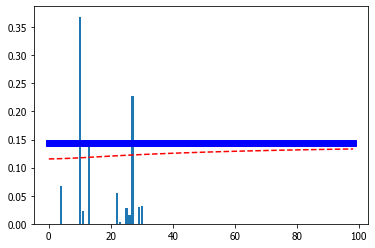

In [ ]:
which = np.argmin(chi2_after_l)
plt.plot(chi2_after_l, 'r--', chi2_before_l, 'bs')
pd.options.display.float_format = '{:.2f}'.format
plt.bar(range(1,1+len(weights_l[which])), weights_l[which])
data['wo_prior_uassigned'] = weights_l[which]
data.to_csv('data/TAR_2D_weights.txt')
data

/Users/aaronfranklab/Dropbox/My Mac (afrankz-mpro.local)/Desktop/CRNA_Workshop/unassigned_ensemble/network_line_graph.py:135: RuntimeWarning: invalid value encountered in less
  weights[weights<edge_vmin] = edge_vmin
/Users/aaronfranklab/Dropbox/My Mac (afrankz-mpro.local)/Desktop/CRNA_Workshop/unassigned_ensemble/network_line_graph.py:136: RuntimeWarning: invalid value encountered in greater
  weights[weights>edge_vmax] = edge_vmax


<module 'matplotlib.pyplot' from '/opt/anaconda3/envs/biophysics_435/lib/python3.7/site-packages/matplotlib/pyplot.py'>

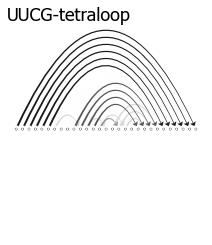

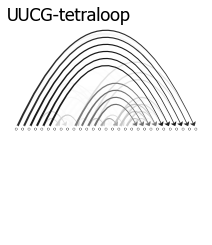

In [ ]:
visualize_structure(average_bp(bp_matrices[:32], data['w_prior_uassigned']), figname = "data/average_TAR_w_prior_uassigned.pdf")
visualize_structure(average_bp(bp_matrices[:32], data['wo_prior_uassigned']), figname = "data/average_TAR_wo_prior_uassigned.pdf")

<module 'matplotlib.pyplot' from '/opt/anaconda3/envs/biophysics_435/lib/python3.7/site-packages/matplotlib/pyplot.py'>

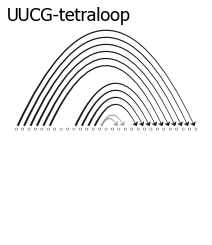

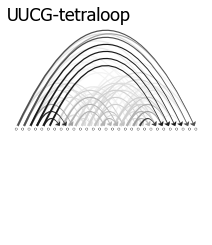

In [ ]:
visualize_structure(average_bp(bp_matrices[:32], priors), figname = "data/average_TAR_boltzmann.pdf")
visualize_structure(average_bp(bp_matrices[:32], priors/priors), figname = "data/average_TAR_uninform.pdf")

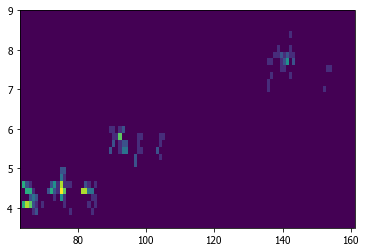

In [ ]:
h, xedge, yedge, image = generate_2D_histogram(expcs_paired)

In [ ]:
image

In [ ]:
from matplotlib.pyplot import hist2d
hist2d?

Signature:
hist2d(
    x,
    y,
    bins=10,
    range=None,
    density=False,
    weights=None,
    cmin=None,
    cmax=None,
    *,
    data=None,
    **kwargs,
)
Docstring:
Make a 2D histogram plot.

Parameters
----------
x, y : array-like, shape (n, )
    Input values

bins : None or int or [int, int] or array-like or [array, array]

    The bin specification:

    - If int, the number of bins for the two dimensions
      (nx=ny=bins).
    - If ``[int, int]``, the number of bins in each dimension
      (nx, ny = bins).
    - If array-like, the bin edges for the two dimensions
      (x_edges=y_edges=bins).
    - If ``[array, array]``, the bin edges in each dimension
      (x_edges, y_edges = bins).

    The default value is 10.

range : array-like shape(2, 2), optional
    The leftmost and rightmost edges of the bins along each dimension
    (if not specified explicitly in the bins parameters): ``[[xmin,
    xmax], [ymin, ymax]]``. All values outside of this range will be
    cons